In [ ]:
def prepare_features_for_regression(df, target='Total Sales'):
    df = df.copy()

    # Example: filtering for a single product if needed
    # df = df[df['product'] == 'YourProduct']

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter

    df = df.sort_values('date')
    df[f'{target}_lag_1'] = df[target].shift(1)
    df[f'{target}_lag_2'] = df[target].shift(2)
    df[f'{target}_lag_3'] = df[target].shift(3)
    df[f'{target}_rolling_mean_3'] = df[target].rolling(window=3).mean()
    df[f'{target}_rolling_mean_7'] = df[target].rolling(window=7).mean()
    df[f'{target}_rolling_std_3'] = df[target].rolling(window=3).std()

    df = df.dropna()

    feature_columns = ['year', 'month', 'day', 'day_of_week', 'quarter',
                       f'{target}_lag_1', f'{target}_lag_2', f'{target}_lag_3',
                       f'{target}_rolling_mean_3', f'{target}_rolling_mean_7', f'{target}_rolling_std_3']

    if 'quantity' in df.columns:
        df['quantity_lag_1'] = df['quantity'].shift(1)
        df['quantity_rolling_mean_3'] = df['quantity'].rolling(window=3).mean()
        feature_columns.extend(['quantity_lag_1', 'quantity_rolling_mean_3'])

    if 'sales_per_unit' in df.columns:
        feature_columns.append('sales_per_unit')

    df = df.dropna()

    X = df[feature_columns]
    y = df[target]

    return X, y

In [ ]:
import pandas as pd
# Change this path to your CSV file location
csv_file_path = '/content/augmented_sales_data.csv'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Display basic info
print(df.head())
print(df.dtypes)

   Order Date Product Category  Sales per Unit  Quantity  Total Sales  \
0  2023-01-01           Beauty             500         3         1500   
1  2023-01-01         Clothing             300         3          900   
2  2023-01-01         Clothing             300         4         1200   
3  2023-01-02         Clothing             500         3         1500   
4  2023-01-02         Clothing              50         3          150   

        date  
0 2023-01-01  
1 2023-01-01  
2 2023-01-01  
3 2023-01-02  
4 2023-01-02  
Order Date                  object
Product Category            object
Sales per Unit               int64
Quantity                     int64
Total Sales                  int64
date                datetime64[ns]
dtype: object


In [ ]:
X, y = prepare_features_for_regression(df, target='Total Sales')

print("Prepared Features (X):", X.shape)
print("Target Variable (y):", y.shape)
print(X)

Prepared Features (X): (33570, 11)
Target Variable (y): (33570,)
       year  month  day  day_of_week  quarter  Total Sales_lag_1  \
6      2023      1    2            0        1               90.0   
7      2023      1    3            1        1               25.0   
8      2023      1    3            1        1             1515.0   
12     2023      1    4            2        1              600.0   
11     2023      1    4            2        1               90.0   
...     ...    ...  ...          ...      ...                ...   
33571  2024     12    2            0        4              113.0   
33572  2024     12    3            1        4              100.0   
33574  2024     12    4            2        4               40.0   
33573  2024     12    4            2        4               68.0   
33575  2024     12    4            2        4               60.0   

       Total Sales_lag_2  Total Sales_lag_3  Total Sales_rolling_mean_3  \
6                  150.0             1500.0

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Example usage:
# X, y = (your features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train_scaled, y_train)
ada_model.fit(X_train_scaled, y_train)

xgb_pred = xgb_model.predict(X_test_scaled)
ada_pred = ada_model.predict(X_test_scaled)

print("XGBoost - R2 Score:", r2_score(y_test, xgb_pred))
print("AdaBoost - R2 Score:", r2_score(y_test, ada_pred))

print("XG RMSE : ",root_mean_squared_error(y_test, xgb_pred))
print("ADa RMSE : ",root_mean_squared_error(y_test, ada_pred))


XGBoost - R2 Score: 0.971389651298523
AdaBoost - R2 Score: 0.6148729680036205
XG RMSE :  46.223758697509766
ADa RMSE :  169.59202871589207


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example usage:
# X, y = (your features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

print("Ridge Regression - R2 Score:", r2_score(y_test, ridge_pred))
print("Lasso Regression - R2 Score:", r2_score(y_test, lasso_pred))

print("ridge RMSE : ",root_mean_squared_error(y_test, ridge_pred))
print("lasso RMSE : ",root_mean_squared_error(y_test, lasso_pred))


Ridge Regression - R2 Score: 0.999999921903384
Lasso Regression - R2 Score: 0.9999973938041632
ridge RMSE :  0.07636942873540414
lasso RMSE :  0.4411710006430489


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(32, return_sequences=True),
        Dropout(0.2),
        LSTM(16, return_sequences=False),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Example usage:
# X, y = (your features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = create_lstm_model((X_train_lstm.shape[1], 1))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm_model.fit(
    X_train_lstm, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]
)

lstm_pred = lstm_model.predict(X_test_lstm).flatten()

print("LSTM MSE:", mean_squared_error(y_test, lstm_pred))
print("LSTM MAE:", mean_absolute_error(y_test, lstm_pred))
print("LSTM R2 Score:", r2_score(y_test, lstm_pred))
print("LSTM RMSE:", root_mean_squared_error(y_test, lstm_pred))


Epoch 1/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 63633.1875 - mae: 128.1520 - val_loss: 12718.7402 - val_mae: 54.9931
Epoch 2/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 10907.9219 - mae: 57.0772 - val_loss: 4760.7412 - val_mae: 37.4771
Epoch 3/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 7406.7319 - mae: 47.1271 - val_loss: 2825.2405 - val_mae: 29.0050
Epoch 4/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 5866.1719 - mae: 41.6997 - val_loss: 3425.1213 - val_mae: 28.5830
Epoch 5/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 5675.7056 - mae: 40.7743 - val_loss: 2594.7319 - val_mae: 25.0918
Epoch 6/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 5430.8140 - mae: 39.8795 - val_loss: 2392.6335 - val_mae: 28.5230
Epoch 7/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 4247.6006 - mae: 36.0446 - val_loss: 2408.9224 - val_mae: 24.3944
Epoch 8/20
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 4856.0586 - mae: 37.72

In [ ]:
# Required installations
!pip install shap

--- Ridge Regression ---
R2 Score: 0.999999921903384
MAE: 0.045737404647852614
RMSE: 0.07636942873540414

--- Lasso Regression ---
R2 Score: 0.9999973938041632
MAE: 0.24108722725682322
RMSE: 0.4411710006430489

--- XGBoost ---
R2 Score: 0.971389651298523
MAE: 12.26154899597168
RMSE: 46.22375733524375

--- AdaBoost ---
R2 Score: 0.6148729680036205
MAE: 139.95091504516608
RMSE: 169.59202871589207

--- LSTM ---
R2 Score: 0.9812278151512146
MAE: 20.204242706298828
RMSE: 37.44217546973266



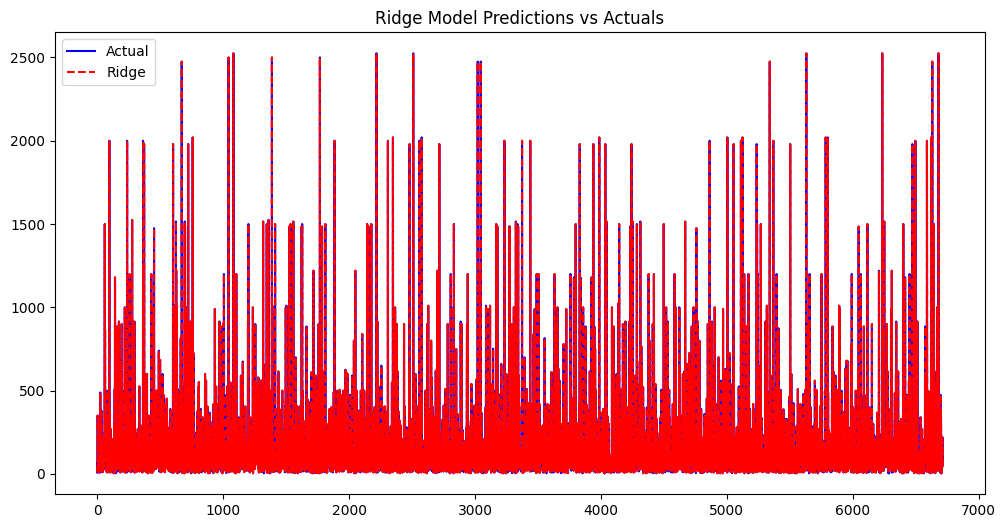

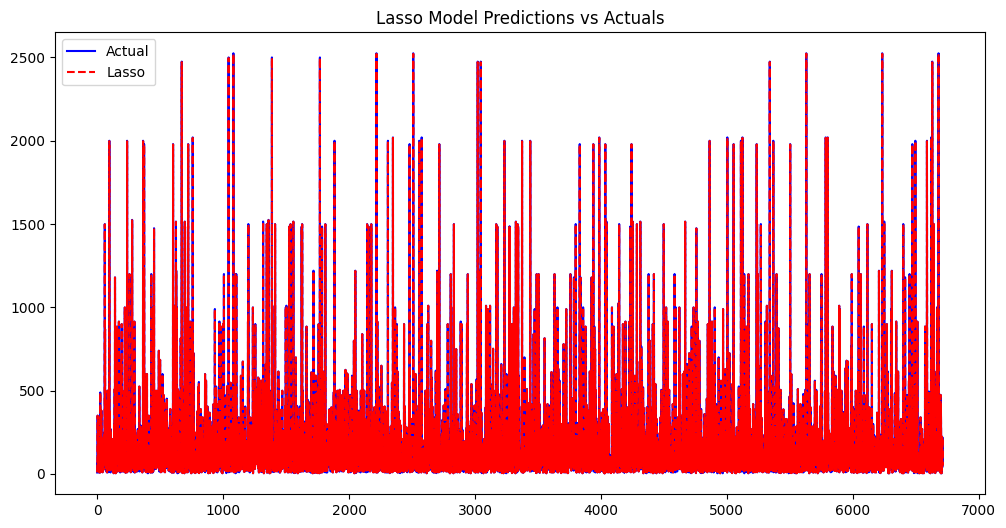

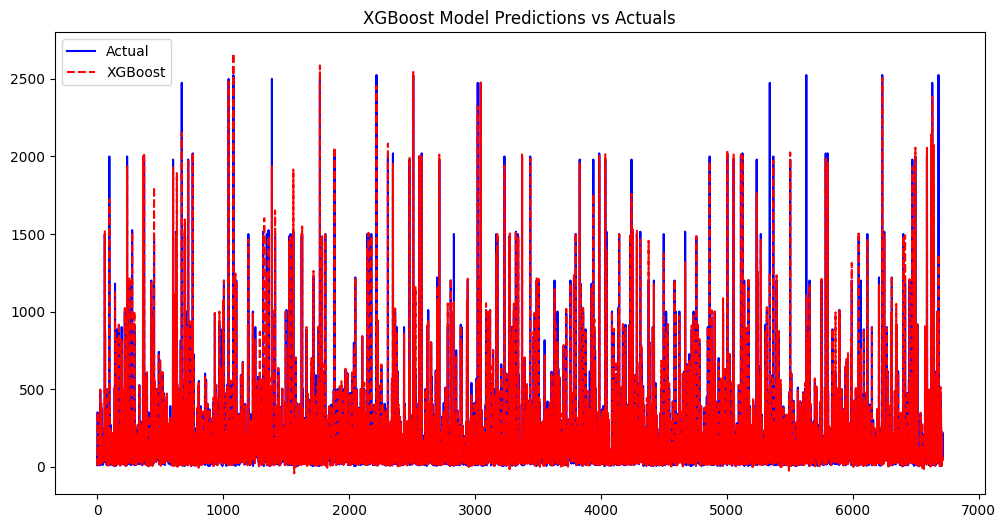

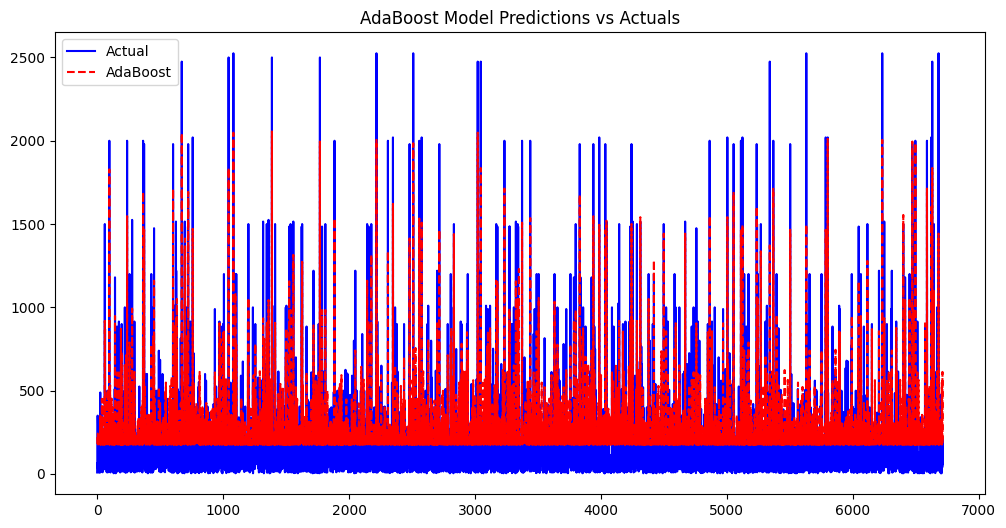

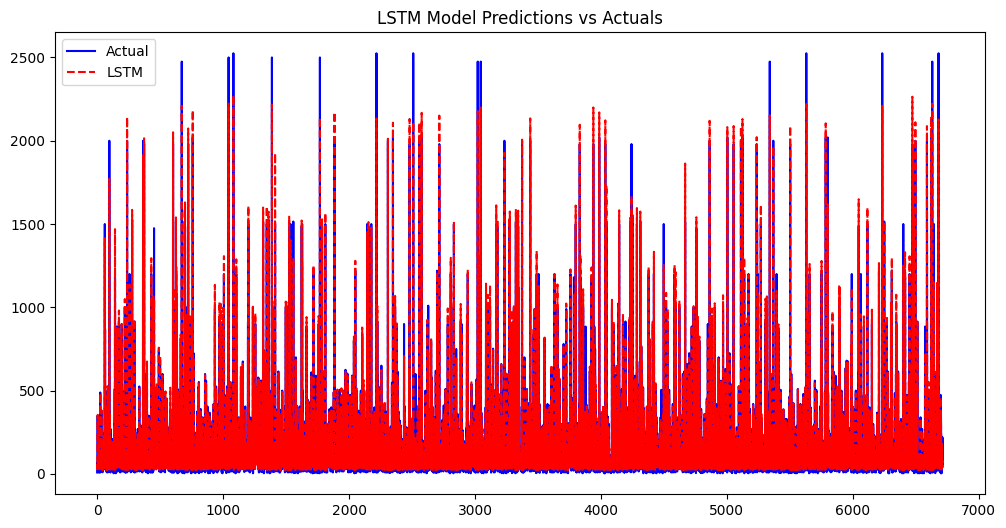

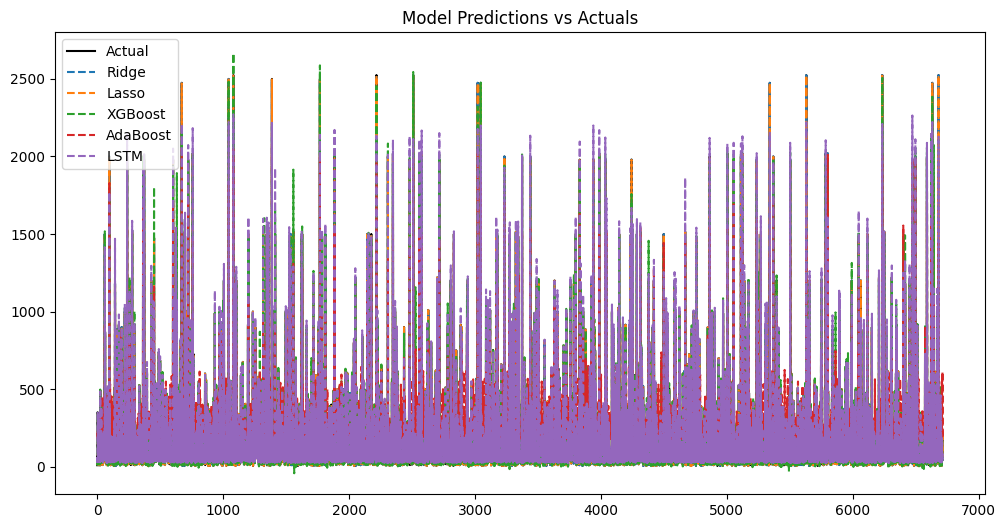

In [ ]:
# --- Evaluation Metrics ---
import shap
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate_model("Ridge Regression", y_test, ridge_pred)
evaluate_model("Lasso Regression", y_test, lasso_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("AdaBoost", y_test, ada_pred)
evaluate_model("LSTM", y_test, lstm_pred)

# --- Plot Predictions vs Actuals ---


plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(ridge_pred, label='Ridge', linestyle='--',color='red')
plt.legend()
plt.title('Ridge Model Predictions vs Actuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lasso_pred, label='Lasso', linestyle='--',color='red')
plt.legend()
plt.title('Lasso Model Predictions vs Actuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(xgb_pred, label='XGBoost', linestyle='--',color='red')
plt.legend()
plt.title('XGBoost Model Predictions vs Actuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(ada_pred, label='AdaBoost', linestyle='--',color='red')
plt.legend()
plt.title('AdaBoost Model Predictions vs Actuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lstm_pred, label='LSTM', linestyle='--',color='red')
plt.legend()
plt.title('LSTM Model Predictions vs Actuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(ridge_pred, label='Ridge', linestyle='--')
plt.plot(lasso_pred, label='Lasso', linestyle='--')
plt.plot(xgb_pred, label='XGBoost', linestyle='--')
plt.plot(ada_pred, label='AdaBoost', linestyle='--')
plt.plot(lstm_pred, label='LSTM', linestyle='--')
plt.legend()
plt.title('Model Predictions vs Actuals')
plt.show()

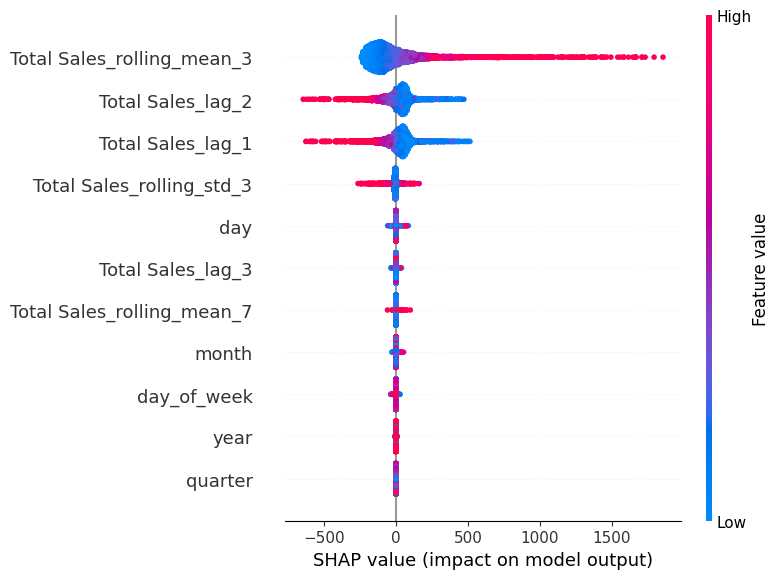

PermutationExplainer explainer: 6715it [01:56, 54.33it/s]                          
/tmp/ipython-input-575996359.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_ridge, X_test, feature_names=X.columns)


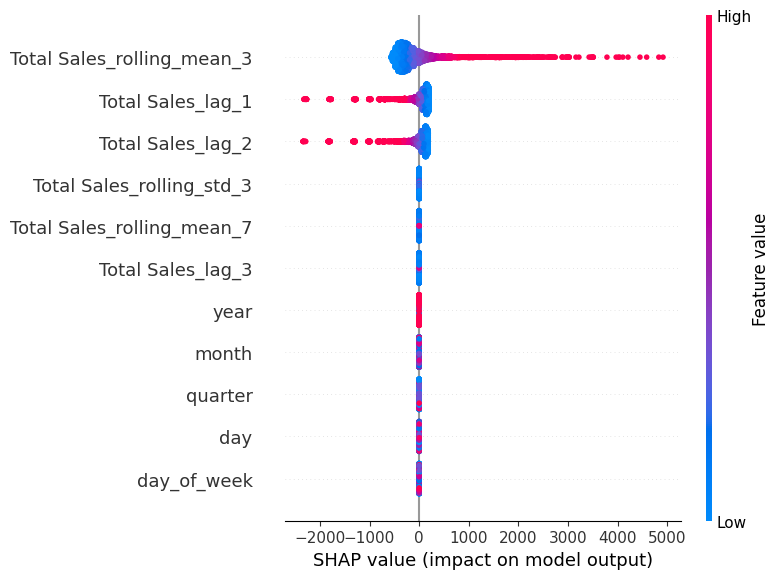

PermutationExplainer explainer: 6715it [01:36, 64.99it/s]                          
/tmp/ipython-input-575996359.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lasso, X_test, feature_names=X.columns)


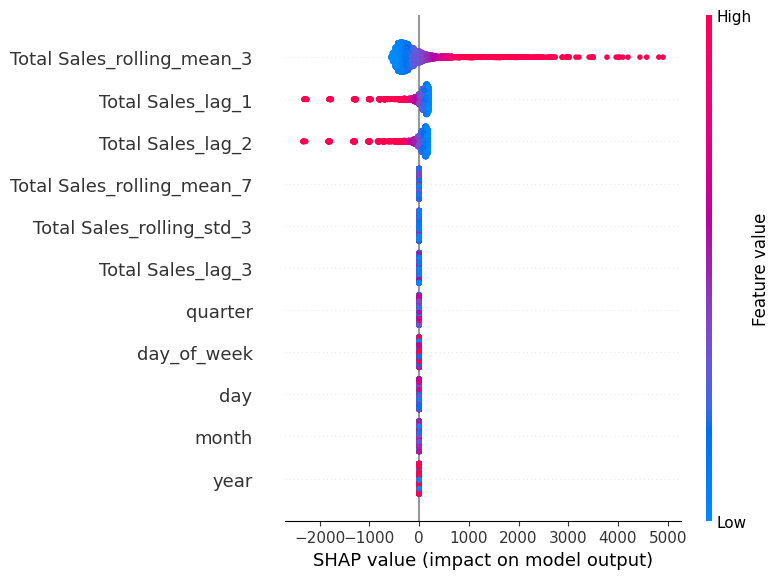

PermutationExplainer explainer:   2%|▏         | 116/6714 [01:24<1:35:25,  1.15it/s]

In [ ]:
# --- SHAP Analysis ---
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test_scaled)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns)

explainer_ridge = shap.Explainer(ridge_model.predict, X_test_scaled)
shap_values_ridge = explainer_ridge(X_test_scaled)
shap.summary_plot(shap_values_ridge, X_test, feature_names=X.columns)

explainer_lasso = shap.Explainer(lasso_model.predict, X_test_scaled)
shap_values_lasso = explainer_lasso(X_test_scaled)
shap.summary_plot(shap_values_lasso, X_test, feature_names=X.columns)

explainer_ada = shap.Explainer(lambda x: ada_model.predict(x), X_test_scaled)
shap_values_ada = explainer_ada(X_test_scaled)
shap.summary_plot(shap_values_ada, X_test, feature_names=X.columns)